# 张量操作与线性回归
本节将介绍张量的基本操作，如张量拼接切分、索引和变换，同时学习张量的数学运算，并基于所学习的知识，实现线性回归模型的训练，以加深知识点的认识。
## 1. 张量的操作: 拼接, 切分, 索引和变换
### 一, 张量拼接与切分 
#### 1.1 torch.cat()
功能: 将张量按维度dim进行拼接，将<font color=red>不会扩张张量的维度</font>
- tensor: 张量序列
- dim: 要拼接的维度

#### 1.2 torch.stack()
功能: 将<font color=blue>新创建的维度</font>dim上进行拼接，<font color=red>会扩张张量的维度</font>
- tensor: 张量序列
- dim: 要拼接的维度

In [5]:
import torch
import numpy as np

t = torch.ones((2,3))
# dim=0, 在第一个维度上拼接
t_0 = torch.cat([t,t], dim=0)
t_1 = torch.cat([t,t], dim=1)

print("t_0:{} \nshape:{}\n\nt_1:{}\nshape:{}". format(t_0, t_0.shape, t_1, t_1.shape))

t_0:tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 
shape:torch.Size([4, 3])

t_1:tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
shape:torch.Size([2, 6])


In [7]:
t = torch.ones((2,3))
# 无论dim=x, 在新的维度上拼接，增加了维度
t_0 = torch.stack([t,t], dim=2)
t_1 = torch.stack([t,t,t], dim=0)

print("t_0:{} \nshape:{}\n\nt_1:{}\nshape:{}". format(t_0, t_0.shape, t_1, t_1.shape))

t_0:tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]]) 
shape:torch.Size([2, 3, 2])

t_1:tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
shape:torch.Size([3, 2, 3])


#### 1.3 torch.chunk()
功能: 将张量按维度dim进行平均切分   
返回值: 张量列表   
注意事项⚠️: 若不能整除，最后一份张量小于其他张量，保证前面的张量都足额切分
- input: 要切分的张量
- chunks: 要切分的分数
- dim: 要切分的维度


In [8]:
t = torch.ones((2,7))
list_of_tensors = torch.chunk(t, dim=1, chunks=3)

for idx, t in enumerate(list_of_tensors):
    print("第{}个张量:{}, shape is {}".format(idx+1, t, t.shape))

第1个张量:tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])
第2个张量:tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])
第3个张量:tensor([[1.],
        [1.]]), shape is torch.Size([2, 1])


#### 1.4 torch.split()
功能: 将张量按维度dim进行平均切分   
返回值: 张量列表   
- tesnor: 要切分的张量
- split_size_or_sections: 为int时，表示每一分的长度；为list时，按list元素切分
- dim: 要切分的维度

In [24]:
t = torch.ones((2,5))
list_of_tensors = torch.split(t, split_size_or_sections=2, dim=1)

for idx, elem in enumerate(list_of_tensors):
    print("第{}个张量:{}, shape is {}".format(idx+1, elem, elem.shape))

第1个张量:tensor([[1., 1.],
        [1., 1.]]), shape is torch.Size([2, 2])
第2个张量:tensor([[1., 1.],
        [1., 1.]]), shape is torch.Size([2, 2])
第3个张量:tensor([[1.],
        [1.]]), shape is torch.Size([2, 1])


In [27]:
list_of_tensors = torch.split(t, split_size_or_sections=[2,1,2], dim=1)

for idx, elem in enumerate(list_of_tensors):
    print("第{}个张量:{}, shape is {}".format(idx+1, elem, elem.shape))

第1个张量:tensor([[1., 1.],
        [1., 1.]]), shape is torch.Size([2, 2])
第2个张量:tensor([[1.],
        [1.]]), shape is torch.Size([2, 1])
第3个张量:tensor([[1., 1.],
        [1., 1.]]), shape is torch.Size([2, 2])


### 二，张量索引   
#### 2.1 torch.index_select()   
功能: 在维度dim上，按index索引数据      
返回值: 依index索引数据拼接的张量 
- input: 要切分的张量
- dim: 要索引的维度
- index: 要索引数据的序号

In [32]:
# 在[0,9)上的均匀分布
t = torch.randint(0, 9, size=(3, 3))
# list转换成tensor，注意数据类型必须是long64-bit整型，不能是float32-bit
idx = torch.tensor([0,2], dtype=torch.long)
# 选取0，2行
t_select = torch.index_select(t, dim=0, index=idx)
print("t:\n{}\nt_select:\n{}".format(t, t_select))

t:
tensor([[5, 5, 7],
        [5, 7, 8],
        [0, 8, 6]])
t_select:
tensor([[5, 5, 7],
        [0, 8, 6]])


#### 2.2 torch.masked_select()   
功能: 按mask中的True进行索引      
返回值: 一维张量 
- input: 要切分的张量
- mask: 与input同形状的布尔类型张量

In [33]:
t = torch.randint(0, 9, size=(3, 3))
# ge is greater than or equal; gt: greater than; and also have le lt
mask = t.ge(5)
t_select = torch.masked_select(t, mask)
print("t:\n{}\nmask:\n{}\nt_select:\n{}".format(t, mask, t_select))

t:
tensor([[4, 3, 3],
        [3, 0, 0],
        [1, 8, 0]])
mask:
tensor([[False, False, False],
        [False, False, False],
        [False,  True, False]])
t_select:
tensor([8])


### 三，张量变换   
#### 3.1 torch.reshape()   
功能: 变换张量形状     
注意事项: 当张量在内存中是连续是，<font color=red>新张量与input共享数据内存</font>
- input: 要切分的张量
- shape: 新张量的形状

In [38]:
# 生成丛0到n-1的随机排列，最常见用来生产一个乱序的索引
t = torch.randperm(8)
# (-1, 4)其中-1是根据另一个维度计算，保证匹配
t_reshape = torch.reshape(t, (-1, 4))
print("t:{}\nt_reshape:\n{}".format(t, t_reshape))

t[0] = 1024
print("t:{}\nt_reshape:\n{}".format(t, t_reshape))
print("t.data 内存地址:{}".format(id(t.data)))
print("t_reshape.data 内存地址:{}".format(id(t_reshape.data)))

t:tensor([2, 3, 7, 0, 4, 1, 5, 6])
t_reshape:
tensor([[2, 3, 7, 0],
        [4, 1, 5, 6]])
t:tensor([1024,    3,    7,    0,    4,    1,    5,    6])
t_reshape:
tensor([[1024,    3,    7,    0],
        [   4,    1,    5,    6]])
t.data 内存地址:4372873008
t_reshape.data 内存地址:4372873008


#### 3.2 torch.transpose()   
功能: 交换张量的两个维度    
- input: 要交换的张量
- dim0: 要交换的维度
- dim1: 要交换的维度

#### 3.3 torch.t()   
功能: 2维张量装置，对矩阵而言，等价于torch.transpose(input, 0, 1)

In [36]:
t = torch.rand((2, 3, 4))
# 最常见的运用在，图像的预处理上，比如读取的图片是: C*H*W --> H*W*C
t_transpose = torch.transpose(t, dim0=1, dim1=2)
print("t shape:{}\nt_transpose shape: {}".format(t.shape, t_transpose.shape))

t shape:torch.Size([2, 3, 4])
t_transpose shape: torch.Size([2, 4, 3])


#### 3.4 torch.squeeze()   
功能: 压缩长度为1的维度(轴)   
- dim: 若为Nonde，一处所有长度为1的轴；若制定维度，当且仅当该轴长度为1时，可以被移除；

#### 3.5 torch.unsqueeze()   
功能: 依据dim扩展维度
- dim: 扩展的维度

In [39]:
t = torch.rand((1, 2, 3, 1))
t_sq = torch.squeeze(t)
t_0 = torch.squeeze(t, dim=0)
t_1 = torch.squeeze(t, dim=1)

print(t.shape)
# 未指定，将移除所有维度
print(t_sq.shape)
print(t_0.shape)
# 指定的维度不是1，不会移除
print(t_1.shape)

torch.Size([1, 2, 3, 1])
torch.Size([2, 3])
torch.Size([2, 3, 1])
torch.Size([1, 2, 3, 1])


### 四，张量数学运算
#### 4.1 torch.add()
功能: 逐元素计算$input+alpha*other$
- input: 第一个张量
- alpha: 乘项因子
- other: 第二个张量

#### 4.2 其他的python风格的操作运算，让代码跟简洁
torch.addcdiv(): $out_i = input_i + value\times \frac{tensor1_i}{tensor2_i}$    
torch.addcmul(): $out_i = input_i + value\times tensor1_i\times tensor2_i$

In [40]:
t_0 = torch.randn((3, 3))
t_1 = torch.ones_like(t_0)
t_add = torch.add(t_0, 10, t_1)

print("t_0:\n{}\nt_1:\n{}\nt_add_10:\n{}".format(t_0, t_1, t_add))

t_0:
tensor([[-0.3519, -1.0902,  0.7411],
        [-0.8252, -1.1531, -0.8708],
        [ 0.7616,  0.5386,  0.6233]])
t_1:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
t_add_10:
tensor([[ 9.6481,  8.9098, 10.7411],
        [ 9.1748,  8.8469,  9.1292],
        [10.7616, 10.5386, 10.6233]])


## 2. 线性回归

### 2.1 模型和损失函数

线性回归是分析一个变量与另外一(多)个变量之间关系的方法    
- 因变量:y 
- 自变量:x 
- 关系:线性   

数学模型: y = wx + b 求解w，b    
求解步骤:
1. 确定模型   
y = wx +b

2. 选择损失函数    
MSE(mean-square error): $loss = \frac{1}{m}\sum_{i=1}^m(y_i-\hat{y_i})^2$

3. 求解梯度并更新w,b   
$w = w - LR * w.grad$  
$b = b - LR * w.grad$

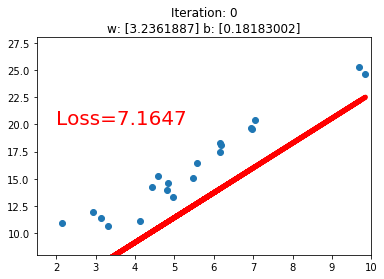

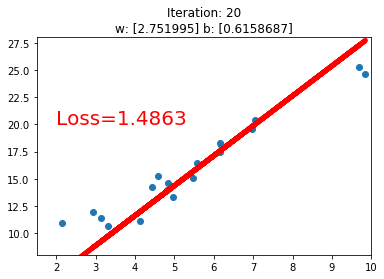

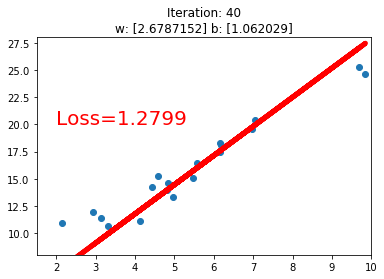

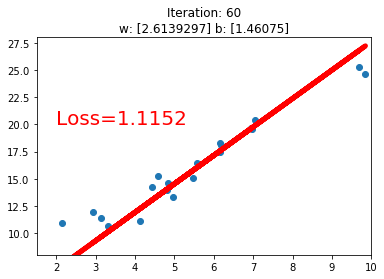

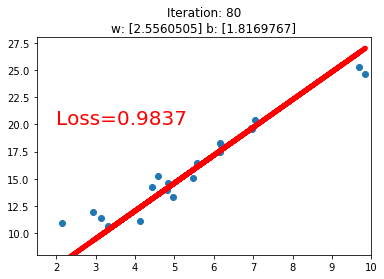

In [45]:
import matplotlib.pyplot as plt
torch.manual_seed(10)

lr = 0.05  # 学习率    20191015修改

# 创建训练数据
x = torch.rand(20, 1) * 10  # x data (tensor), shape=(20, 1)
y = 2*x + (5 + torch.randn(20, 1))  # y data (tensor), shape=(20, 1)

# 构建线性回归参数
w = torch.randn((1), requires_grad=True)
b = torch.zeros((1), requires_grad=True)

for iteration in range(1000):

    # 前向传播
    wx = torch.mul(w, x)
    y_pred = torch.add(wx, b)

    # 计算 MSE loss
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # 反向传播
    loss.backward()

    # 更新参数
    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)

    # 清零张量的梯度   20191015增加
    w.grad.zero_()
    b.grad.zero_()

    # 绘图
    if iteration % 20 == 0:

        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
        plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title("Iteration: {}\nw: {} b: {}".format(iteration, w.data.numpy(), b.data.numpy()))
        plt.show()
        plt.pause(0.5)

        if loss.data.numpy() < 1:
            break

### 2.2 为什么每次迭代梯度要清零
如果不清零，梯度将会累加

In [58]:
x = torch.tensor(2, dtype=float, requires_grad=True)

for i in range(10):
    y = torch.mul(x,2)
    y.backward()
    print(x.grad)

tensor(2., dtype=torch.float64)
tensor(4., dtype=torch.float64)
tensor(6., dtype=torch.float64)
tensor(8., dtype=torch.float64)
tensor(10., dtype=torch.float64)
tensor(12., dtype=torch.float64)
tensor(14., dtype=torch.float64)
tensor(16., dtype=torch.float64)
tensor(18., dtype=torch.float64)
tensor(20., dtype=torch.float64)


In [60]:
x = torch.tensor(2, dtype=float, requires_grad=True)

for i in range(10):
    y = torch.mul(x,2)
    y.backward()
    print(x.grad)
    x.grad.zero_()

tensor(2., dtype=torch.float64)
tensor(2., dtype=torch.float64)
tensor(2., dtype=torch.float64)
tensor(2., dtype=torch.float64)
tensor(2., dtype=torch.float64)
tensor(2., dtype=torch.float64)
tensor(2., dtype=torch.float64)
tensor(2., dtype=torch.float64)
tensor(2., dtype=torch.float64)
tensor(2., dtype=torch.float64)
